# TP SVM SD210
## Antoine Habis
## Dimitri Theveneau

## Question 1

In [1]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

########iris dataset#########################################################################################################
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train, y_train)
print(str(clf.predict(X_test))+'\n')
print('le pourcentage de réussite de cette fonction de décision est de ' +str(100*clf.score(X_test,y_test))+'%'+'\n\n')


[2 2 2 1 1 1 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 1 2
 2 2 1 1 1 1 2 2 1 2 2 2 2]

le pourcentage de réussite de cette fonction de décision est de 70.0%




## Question 2

In [2]:

clf = svm.SVC(gamma = 'auto',kernel='poly')
clf.fit(X_train, y_train)
print(str(clf.predict(X_test))+'\n')
print('le pourcentage de réussite de cette fonction de décision est de ' +str(100*clf.score(X_test,y_test))+'%')

[2 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 1 2 1 2
 2 2 1 1 1 1 2 2 1 2 2 2 2]

le pourcentage de réussite de cette fonction de décision est de 76.0%


Il semblerait que l'utilisation du kernel polynomial soit judicieuse car la fonction de décision est plus juste $76\%$ contre $70\%$

## Question 3

$
\left.
\begin{matrix} 
\xi_i \geq0, \\
\xi_i\geq 1-y_i(\langle w,\Phi(x_i)\rangle+w_0),
\end{matrix} \forall i \in \{1,...,n\} 
\right\}
\iff 
\xi_i \geq max(0, 1-y_i(\langle w,\Phi(x_i)\rangle+w_0)$



Or, 



$max(0, 1-y_i(\langle w,\Phi(x_i)\rangle+w_0)=[1-y_i(\langle w,\Phi(x_i)\rangle+w_0]_+$



Puis comme:



$
\begin {align}
\underset{w \in H, w_o \in \mathbb{R}, \xi \in \mathbb{R}^n}{\text{argmin}} (\frac{1}{2}||w||^2 +C\sum_{i=1}^{n} \xi_i)&=&\underset{w \in H, w_o \in \mathbb{R}}{\text{argmin}} (\underset{\xi}{min}(\frac{1}{2}||w||^2 +C\sum_{i=1}^{n} \xi_i))\\
&=&\underset{w \in H, w_o \in \mathbb{R}}{\text{argmin}} (\frac{1}{2}||w||^2 +C [1-y_i(\langle w,\Phi(x_i)\rangle+w_0)]_+)\\
\end{align}$


Car en effet la fonction est croissante en $\xi$ il suffit donc de prendre la plus petite valeur

C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(380, 10000)
(380, 100, 100, 3)
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.000s
Chance level : 0.6210526315789474
(190, 10000) (190,)
Accuracy : 0.8894736842105263


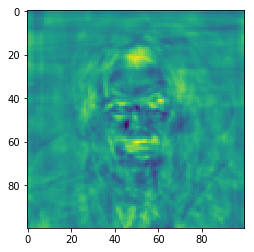

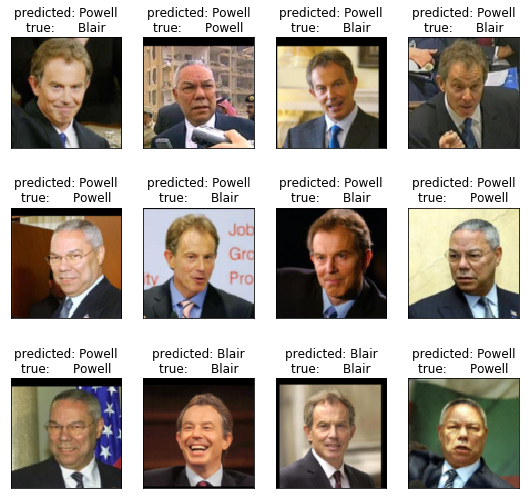

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svmsource import frontiere, rand_gauss, rand_bi_gauss, plot_2d
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA

###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()
####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features
# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)
print(X.shape)
print(images.shape)
# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, images, test_size=0.5, random_state=0)
                                                                               
indices = np.random.permutation(X.shape[0])
                                                                               
train_idx, test_idx = indices[:int(X.shape[0] /2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
print("Predicting the people names on the testing set")
t0 = time()


print("done in %0.3fs" % (time() - t0))
print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print(X_test.shape, y_test.shape)
print("Accuracy : %s" % clf.score(X_test, y_test))

#QUESTION 5 : TODO : try various values for C in the SVC function and plot the error curve

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))

# ####################################################################
# # Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

y_pred = clf.predict(X_test)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()


## Question 4

Le SVM minimise 
\begin{equation}
\sum_{i=1}^{n}{(1-y_i(<w,\phi(x_i)>)+\omega_0)_{+}}
\end{equation}
Or l'erreur 0-1 est donnée par $1_{(1-y_i(<w,\phi(x_i)>)+\omega_0)\leq0}$

Or si $x\leq0$ on a $1_{x\leq0}=1 \leq 1-x=[1-x]_+$

et si $x>0$ on a $1_{x\leq0}=0 \leq [1-x]_+$

Donc le SVM minimise un majorant convexe de l'erreur 0-1

## SVM gui.py

La fonction que l'on cherche à minimiser est $\frac{1}{2}||w||^2 +C\sum_{i=0}^{n} \xi_i$


On se place dans le cas où les données sont bien séparées et l'une des régions est beaucoup plus grande que l'autre.



On remarque que pour un C suffisamment grand on observe aucune erreur dans la classification des données. Ce qui est prévisible car comme C est en facteur $\sum_{i=0}^{n} \xi_i$ alors les erreurs augmentent beaucoup la valeur de la fonction objectif. On aura donc tendance à ne laisser aucune erreur.

En revanche si C est petit très petit le terme $C\sum_{i=0}^{n} \xi_i$ devient secondaire et on peut donc autoriser plus d'erreurs. L'hyperplan va donc se placer de manière à minimiser la quantité $||w||^2$. On obtient  donc une classification des données avec  des erreurs alors qu'il y aurait pu ne pas en avoirL.

## Question 5

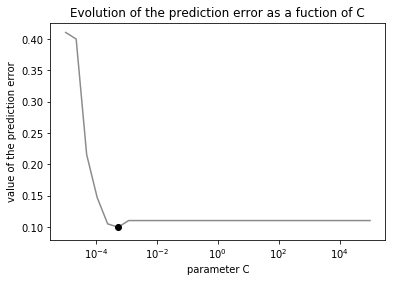

In [4]:

################################""/!\/!\/!\/!\/!\/!\/!\/!\/!\/!\/!\###########################################################
################################""/!\/!\/!\/!\/!\/!\/!\/!\/!\/!\/!\###########################################################
#########################Cette cellule met quelques secondes à s'executer#####################################################

prediction_error=[]
c=np.logspace(-5,5,30)
for x in c:
    clf = svm.SVC(C=x,kernel='linear')
    clf.fit(X_train, y_train)
    prediction_error.append(1-clf.score(X_test,y_test))
plt.plot(c,prediction_error,color='k', alpha=0.45)
plt.xscale('log')
plt.scatter(c[prediction_error.index(min(prediction_error))],min(prediction_error),color='k',label='prediction error minimum')
plt.xlabel('parameter C')
plt.ylabel('value of the prediction error')
plt.title ('Evolution of the prediction error as a fuction of C')
plt.show()

Ceci parait tout à fait cohérent! En effet C est en facteur de $\sum_i \xi_i$.


Les $\xi_i$ sont de paramètres autorisants des erreurs dans la classification. 

Ainsi, si C est tout petit alors les erreurs $\xi_i$ n'auront pas beaucoup d'impact sur 
$   \frac{1}{2}||w||^2 +C\sum_{i=1}^{n} \xi_i$.

On peut donc ainsi autoriser beaucoup plus d'érreurs d'où la prediction error qui est très élevée (0.60).

Puis, plus on augmente la valeur de C et plus faire des erreurs devient pénalisant on a donc une prediction error qui diminue car les erreurs auront tendance à diminuer.

Enfin la prediction error réaugmente aux alentours de C =100. Cela peut s'expliquer par le fait que quand on augmente C on aura tendance à minimiser complètement les $\xi_i$ liés au train set.

On est ici dans l'overfitting. Une fois appliqué au test set, les resultats sont moins bons car trop adapté au train set.

## Question 6

Nous allons ajouter des points dans le train set de manière completement aléatoire afin de montrer que si l'algorithme 
s'entraine avec des données biaisées alors il sera moins performant.

In [5]:
#######################Definition des "nuisances variables" que l'on ajoute au training set##################
n,l = X_train.shape
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
mean_decision_error = 0 
k = 2    ### nombre d'entrainements sur des datasets brouillés
errors = 500 ### nombre d'exemples aléatoires ajoutés au dataset initial à chaque itération

for i in range(k):
    X_biaise = np.random.standard_normal((errors,l))
    #X_biaise = noises[None:] * std + mean[None:]
    Y_biaise = np.random.randint(0,2,errors)

    Y_train_biaise = np.concatenate((y_train,Y_biaise))
    X_train_biaise = np.concatenate((X_train,X_biaise), axis=0)

    clf1 = svm.SVC(kernel='linear')
    clf1.fit(X_train_biaise, Y_train_biaise)
    mean_decision_error += 1 - clf1.score(X_test,y_test)
    
    
mean_decision_error/=k


print('En moyenne la decision error après ajout de '+str(errors)+' données aléatoires sur '+str(k)+'entrainements est de ' +str(np.round(100*mean_decision_error,2))+'%')

En moyenne la decision error après ajout de 500 données aléatoires sur 2entrainements est de 8.68%


Cette valeur est bien supérieure à celle trouvée précedement (1-Accuracy trouvée dans la cellule de la question 3)

Nous allons ici ajouter des features aléatoires et non des expériences. 

In [6]:
nb_nuisances = np.arange(0, 12000, 2000)
scores = []

false_features = np.random.randn(X.shape[0], nb_nuisances[-1])

for i in nb_nuisances:
    false = false_features[:, :i]
    mean = false.mean(axis = 0)
    std = false.std(axis = 0)
    for k in range(i):
        false[:, k] -= mean[k]
        false[:, k] /= std[k]
    
    X_false = np.hstack((X, false))
    X_train_false, X_test_false = X_false[train_idx, :], X_false[test_idx, :]
    
    clf_false = SVC(kernel = 'linear')
    clf_false.fit(X_train_false, y_train)
    y_pred_false = clf_false.predict(X_test_false)
    scores.append(clf_false.score(X_test_false, y_test))

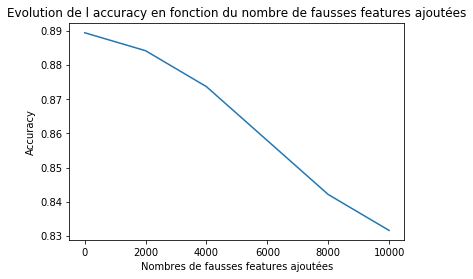

In [7]:
plt.figure()
plt.xlabel('Nombres de fausses features ajoutées')
plt.ylabel('Accuracy')
plt.title('Evolution de l accuracy en fonction du nombre de fausses features ajoutées')
plt.plot(nb_nuisances, scores)
plt.show()

Le score est bien décroissant. 

## Question 7

Il y a deux réponses à cela:


        1)   Lorsque l'on fait une SVM on va chercher à fitter sur un training set. Si le training set n'est pas centré réduit, on va fitter en prenant en compte la moyenne et la variance de ce training set précis. Ce que l'on cherche à faire en réalité, c'est de regarder la ditribution seulement.
        
$\rightarrow $ En fait, l'hyperplan optimal est influencé par la taille des features du trainingset. Si on centre et réduit l'information notre SVM devient indépendante de la moyenne et de la variance de la partie de l'information sur laquelle elle s'est entrainée. On peut donc l'appliquer sans crainte à notre training set centré réduit.
       
        2)   Si on ne centre pas et l'on ne réduit pas l'information, comme la svm fonctionne sur la distance du point  à l'hyperplan, si cette distance est très élevée, un point peut largement prévaloir sur beaucoup d'autres et faire pencher d'avantage l'hyperplan d'un côté de manière démesurée.

## Question 8

A partir de maintenant nous allons retenir les features les plus important pour classifier.
C'est ce que fait le PCA. 

Cela permet d'ameliorer les performances de l'algorithme (moins de features à traiter) et de ne se concentrer que sur celles importantes.


Il est important de noter que dans notre cas les features sont de pixels!

In [8]:
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf = svm.SVC(kernel='linear')
clf.fit(X_train_pca,y_train)
print('le pourcentage de réussite de cette fonction de décision avec un kernel linéaire est de ' +str(100*clf.score(X_test_pca,y_test))+'%\n')


clf = svm.SVC(kernel='poly')
clf.fit(X_train_pca,y_train)
print('le pourcentage de réussite de cette fonction de décision avec un kernel polynomial est de ' +str(100*clf.score(X_test_pca,y_test))+'%\n')


clf = svm.SVC(kernel='rbf')
clf.fit(X_train_pca,y_train)
print('le pourcentage de réussite de cette fonction de décision avec le kernel rbf est de ' +str(100*clf.score(X_test_pca,y_test))+'%\n')


clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train_pca,y_train)
print('le pourcentage de réussite de cette fonction de décision avec le kernel sigmoid est de ' +str(100*clf.score(X_test_pca,y_test))+'%\n')



le pourcentage de réussite de cette fonction de décision avec un kernel linéaire est de 88.42105263157895%

le pourcentage de réussite de cette fonction de décision avec un kernel polynomial est de 80.52631578947368%

le pourcentage de réussite de cette fonction de décision avec le kernel rbf est de 58.94736842105262%

le pourcentage de réussite de cette fonction de décision avec le kernel sigmoid est de 54.21052631578947%



On peut voir ici que le kernel linéaire est beaucoup plus performant que les autres kernels et en particulier le kernel rbf qui a un pourcentage de réussite bien plus faible (environ 62% contre environ 92% pour le linéaire)

## Question 9

In [9]:
def hinge(x):
    return max(1-x,0)
def fonction_objectif(w,w0,C):
    S=0
    for i in range (len(X_train_pca)):
        S+=C*hinge(y_train[i]*(np.dot(w,X_train_pca[i])+w0))
    return ((1/2)*np.linalg.norm(w)**2+S)

In [10]:
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
L=X_train_pca

clf = SVC(kernel='linear',tol=2.1)
clf.fit(X_train_pca,y_train)

coef=clf.coef_
dual_coef = clf.dual_coef_
intercept = clf.intercept_

X_train_pca=[X_train_pca[clf.support_[i]] for i in range (len(clf.support_))]
W_dual=0 
for i in range (len(X_train_pca)):
        W_dual+=dual_coef[0][i]*X_train_pca[i]
        
        
d = fonction_objectif(coef,intercept,C=1)
p = fonction_objectif(W_dual,intercept,C=1)
diff=p-d

# print(dual_coef)
# print(coef)

## pour print les coeffs enlever les hashtags au dessus.

print('la solution duale et la solution primale sont très proches.\n La  différence vaut: '+str(diff))


la solution duale et la solution primale sont très proches.
 La  différence vaut: 0.0


## Question 10


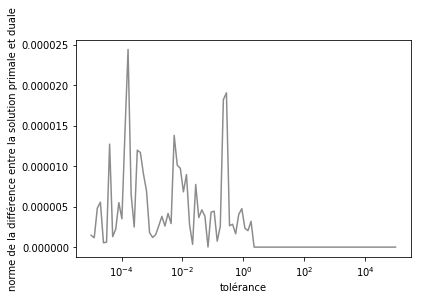

In [11]:
nb_points=100
Tols=np.logspace(-5,5,nb_points)
values_diff=[]
valued=[]
valuep=[]

for Tol in Tols:
    clf = SVC(kernel='linear',tol=Tol)
    clf.fit(L,y_train)
    coef=clf.coef_
    dual_coef = clf.dual_coef_
    intercept = clf.intercept_
    X_train_pca=L
    X_train_pca=[X_train_pca[clf.support_[i]] for i in range (len(clf.support_))]
    W_dual=0 
    for i in range (len(X_train_pca)):
            W_dual+=dual_coef[0][i]*X_train_pca[i]
    d = fonction_objectif(W_dual,intercept,C=1)
    p = fonction_objectif(coef,intercept,C=1)
    values_diff.append(abs(p-d))
    valuep.append(p)
    valued.append(d)
plt.plot(Tols,values_diff,color = 'k', alpha=0.45)
# plt.plot(Tols,valued,color = 'k', alpha=0.45)
# plt.plot(Tols,valuep,color ='b', alpha=0.45)

plt.xscale('log')
plt.xlabel('tolérance')
plt.ylabel('norme de la différence entre la solution primale et duale')
plt.show()

On observe que plus on a tendance à élever la tolérance plus les valeurs primales et duales de la fonction objectif sont proches.